# NetworkX Exploration

By: Tyler Biggs

## Package imports and notebook setup

In [19]:
import networkx as nx
import random
import numpy as np

# Plotting tools.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [20]:
# Setup matplotlib for nice notebook output.
# Commands that begin with a `%` are `magic` jupyter-notebook
# specific functions.
%matplotlib notebook

## Importing Data

Right now this is specific to my system. I will update for CoCalc implementation later.

In [21]:
# Assign the data path.
# I removed the first two lines, an empty line and a line
# that contained the count. (for simplicity)
data_path = 'data/water1.xyz'

In [22]:
# Open and close the file in a pythonic way.
# The file will be closed once we exit the `with` statement.
with open(data_path) as my_file:
    water_data = my_file.read()

In [23]:
# De-comment and run to view the messy state of `water_data`.
# print(water_data)

In [24]:
# Split the giant string generated above into a list.
# This also removes the newline characters, `/n`.
water_data = water_data.splitlines()

In [25]:
# De-comment and run to view the clean, but large output
# of `water_data`.
# print(water_data)

In [26]:
# Now examine the first, last, and some random lines.
print(f'The first line:\n\t{water_data[0]}')
print(f'The last line:\n\t{water_data[-1]}')
print(f'Some randome line:\n\t{random.choice(water_data)}')

The first line:
	O     0.154966E+01  0.112994E+02  0.150422E+02
The last line:
	H     0.133676E+02  0.492056E+01  0.127673E+02
Some randome line:
	O     0.101191E+02  0.757785E-01  0.808589E+01


## Creating a graph

From the `networkx` documentation.

> By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links,
etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a
customized node object, etc.

### Adding nodes with positional information

There is no magic from the networkx package here. I simply assign nodes as strings built from their atom type and line number in the list. I then add a python dictionary I name `xyz` that will hold the list of x, y, z coordinates.

In [27]:
# Create an empty graph object.
# I place this in the same code block as the loop below to
# ensure that the graph is empty each time the data is
# added to the graph.
graph = nx.Graph()

# For each item in the water_data list I will create a node.
# I use Python's enmuerate to easily match an index to the
# current item in the for loop.
for index, item in enumerate(water_data):
    
    # The item at this point is still a single string, so
    # now I will break each line into sub-lists.
    # The split() function splits by whitespace as a default.
    line = item.split()
    
    # I will name the node based on its position. The list
    # created has 4 entries, the first is the atom element,
    # the next three are the x, y and z coordinates.
    node_name = f'{line[0]}-{index}'
    
    # Now I will get the actual numbers from the list.
    # I chose to use numpy, it is standard practice.
    # Here I use Python's splice notation to grab everythin
    # from the second item to the end of the list.
    # Also used is a `generator`. It is a faster and more
    # succint way to process lists.
    line_coords = [np.float(x) for x in line[1:]]
    
    # Create the actual node.
    graph.add_node(node_name, xyz=line_coords)

#### State of the graph

The graph has a bunch of nodes that have no edges inbetween them. The nodes do however, have their x, y, z positions attached to them. We should at least be able to generate a scatter plot.

In [28]:
# Getting attributes from our graph.
coords = nx.get_node_attributes(graph, 'xyz')

# This gives us a dictionary, which isn't great for
# the plotting tools. Instead matplotlib would rather
# have separate lists of x, y and z values.
x_vals = [x[0] for x in coords.values()]
y_vals = [x[1] for x in coords.values()]
z_vals = [x[2] for x in coords.values()]

### Plotting the X, Y, Z coordinates

<IPython.core.display.Javascript object>


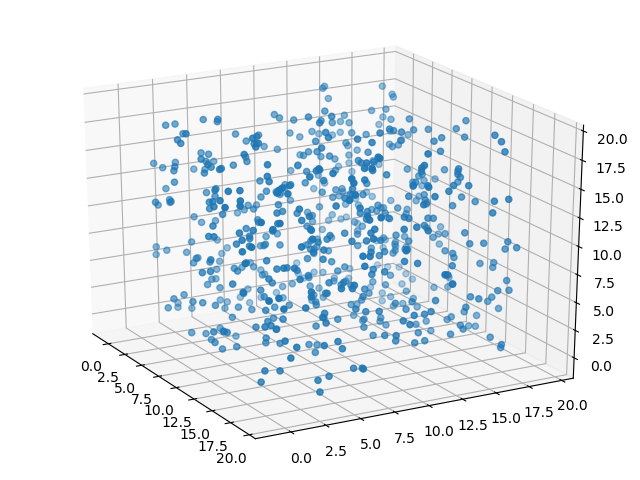

In [31]:
# Declare the figure object.
fig = plt.figure()

# Declare an axis object within / on the figure object.
# See the below link for a discussion of matplotlib's subplot.
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
ax = Axes3D(fig)

# Add the points to the scatter plot.
ax.scatter(x_vals, y_vals, z_vals)

# Show the plot.
plt.show()

## Adding Edges

This is where things become less clear...

### Finding Water Molecules

I see lots of sets of three nodes in the above scatter plot. Linking together individual waters seems like a reasonable place to start.

## Creating Distance Matricies

[I have no idea what I am doing](http://i0.kym-cdn.com/entries/icons/original/000/008/342/ihave.jpg)

In [ ]:
# Create an n x n matrix from the 

In [35]:
len(coords)

648